# Week 4 Exercise: The harmonic oscillator. 

Given a 1D Harmonic oscillator with characteristic frequency $ \omega_0 = 5$ Hz, mass of 20, starting at the initial position of 1, with an initial momentum of 1. 

- Can You define the coordinates of the Phase space of the Harmonic oscillator? 

- How would you represent the motion of the Harmonic oscillator in Phase Space? 

- What is the most probable state for the Harmonic oscillator? 

### Example Solution

To answer the questions posed in this exercise we need to identify the set of points in phase space that corresponds to the microcanonical ensemble of configurations of a monodimensional harmonic oscillator. 

The harmonic potential energy function reads: 

$$
U(x)=\frac{1}{2}kx^2
$$

where $x$ here indicates the only degree of freedom of the Harmonic oscillator, and $k$ is the so called *spring* constant. 

The force acting on the single degree of freedom corresponds to $F_x=-\frac{dU(x)}{dx}$.
As such, according to Newton second law: 

$$
\frac{d^2x}{dt^2}=-\frac{k}{m}x
$$

The function $x(t)$ solving this second order differential equation has to be a function that, differentiated twice gives us the back the original function multiplied by a constant. 

An educated guess for such a function is: 

$$
x(t)= C\cos{(\omega_0t)}+D\sin{(\omega_0t)}
$$

where $C$, $D$, and $\omega_0$ are undetermined constants, the latter of which ($\omega_0$) has the physical meaning of an angular velocity.

Adopting this *ansatz* as a model solution for the problem we write an expression for the velocity and for the acceleration:

$$
v(t)= \frac{dx(t)}{dt} = -\omega_0C\sin{(\omega_0t)}+D\omega_0\cos{(\omega_0t)}
$$

and 

$$
a(t)= \frac{dv(t)}{dt} = -\omega_0^2C\cos{(\omega_0t)}-D\omega_0^2\sin{(\omega_0t)} = -\omega_0^2x(t)
$$

The constant $\omega_0$ can be obtained by noting that: 

$$
-\omega_0^2x(t) = -\frac{k}{m}x(t)
$$

thus leading to: 

$$
\omega_0=\sqrt{\frac{k}{m}}
$$

The constants $C$ and $D$ can be obtained from the initial conditions. The initial position: $x(t=0)=x_0$ gives us constant $C=x_0$. The initial velocity $v(t=0)=v_0$ gives us constant $D=v_0/\omega_0$.

The position and velocity equations are thus: 

$$
x(t)= x_0\cos{(\omega_0t)}+\frac{v_0}{\omega_0}\sin{(\omega_0t)}
$$

$$
v(t)= -\omega_0x_0\sin{(\omega_0t)}+v_0\cos{(\omega_0t)}
$$

Now plotting $(x(t),mv(t))$ allows to represent the set of configurations that belong to the Harmonic oscillator in its two-dimensional phase space. 

### Solution Example: 

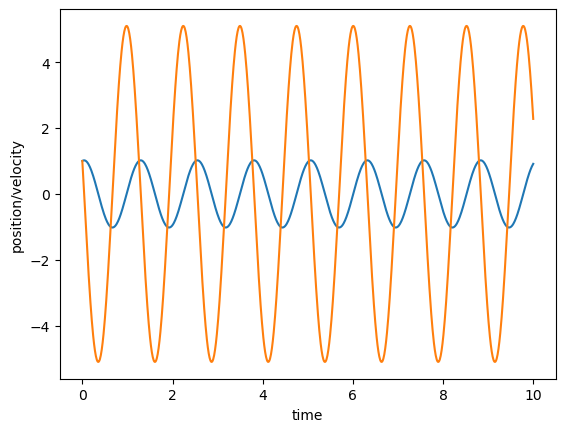

In [1]:
#Import libraries
import matplotlib.pyplot as plt 
from matplotlib import cm
import numpy as np


dt=0.01; #timestep
total_time=10; 
# Compute the total number of steps
nsteps=int(total_time/dt); # Total number of steps

time=np.linspace(0,total_time,nsteps)

x0 = 1
v0 = 1 
omega0 = 5
m = 20
k=m*omega0**2

position=lambda x0, v0, omega0, time: x0*np.cos(omega0*time) + v0/omega0*np.sin(omega0*time)
velocity=lambda x0, v0, omega0, time: -x0*omega0*np.sin(omega0*time) + v0*np.cos(omega0*time)

plt.plot(time,position(x0,v0,omega0,time));
plt.xlabel('time');
plt.ylabel('position/velocity');
plt.plot(time,velocity(x0,v0,omega0,time))


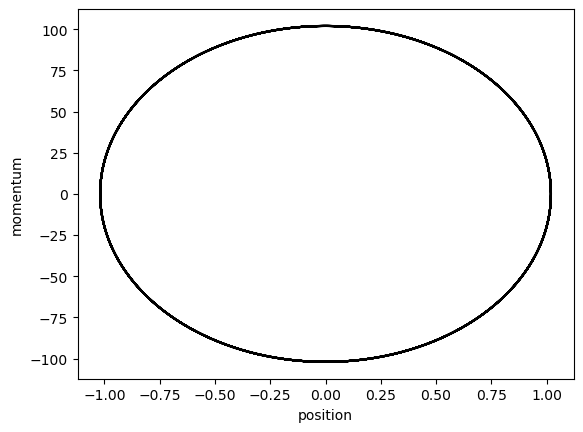

In [2]:
plt.plot(position(x0,v0,omega0,time),m*velocity(x0,v0,omega0,time),'k-')
plt.xlabel('position');
plt.ylabel('momentum');


## An Alternative approach: Verlet equation. 

Alternatively, one can obtain an approximate expression for $x(t)$ valid for small changes in $t$. 
To this aim one can write the Tylor expansion of $x(t)$ around time $t$, for a small timestep in the future $+\Delta{t}$. 

$$
x(t+\Delta{t})=x(t)+\frac{dx}{dt}\Delta{t}+\frac{1}{2}\frac{d^2x}{dt^2}\Delta{t}^2+\frac{1}{3}\frac{d^3x}{dt^3}\Delta{t}^3
$$

we can do the same also for a timestep $-\Delta{t}$, in the past: 

$$
x(t-\Delta{t})=x(t)-\frac{dx}{dt}\Delta{t}+\frac{1}{2}\frac{d^2x}{dt^2}\Delta{t}^2-\frac{1}{3}\frac{d^3x}{dt^3}\Delta{t}^3
$$


We can now sum both sides of the equal sign of the two Taylor expansions: 

$$
x(t+\Delta{t})=2x(t)+\frac{d^2x}{dt^2}\Delta{t}^2-x(t-\Delta{t})
$$


By introducing Newton's equation $\frac{d^2x}{dt^2}=\frac{F}{m}$ leading to the so-called Verlet equation:

$$
x(t+\Delta{t})=2x(t)+\frac{F}{m}\Delta{t}^2-x(t-\Delta{t})
$$

which the can be iteratively solved to generate a trajectory for the Harmonic oscillator, as demonstrated in the code below: 


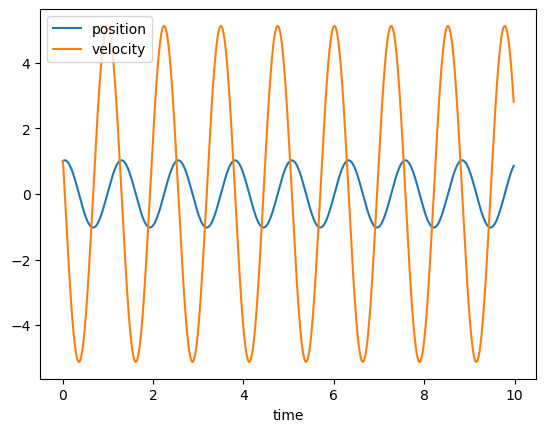

In [3]:
## Define the timestep and the total time


## Initialise vectors 
vV=np.zeros(nsteps)
rV=np.zeros(nsteps)

## Useful functions
force=lambda x, k,  : -k*(x)
velocityV=lambda r, r_past, dt: (r-r_past)/2/dt
verlet=lambda r, r_past, force, mass, dt:  2*r-r_past+(dt**2)*force/mass

# initialise position and velocity for the first two points
time[0]=0;
time[1]=dt;
vV[0]=v0;
rV[0]=x0;
rV[1]=rV[0]+vV[0]*dt
vV[1]=velocityV(rV[0],rV[1],dt);    

# Compute trajectory by iteratively compute a new position with the Verlet expression:
for ts in np.arange(1,nsteps-1): #Cycle over timesteps
    f=force(rV[ts],k) # Compute the force  
    rV[ts+1]=verlet(rV[ts],rV[ts-1],f,m,dt) # Compute the next position
    time[ts+1]=time[ts]+dt # update the clock
    vV[ts]=velocityV(rV[ts+1],rV[ts-1],dt) # compute the velocity     

plt.plot(time[:-1],rV[:-1],label='position');
plt.plot(time[:-1],vV[:-1],label='velocity');
plt.legend();
plt.xlabel('time');


## Comparing exact and iterative numerical solution:

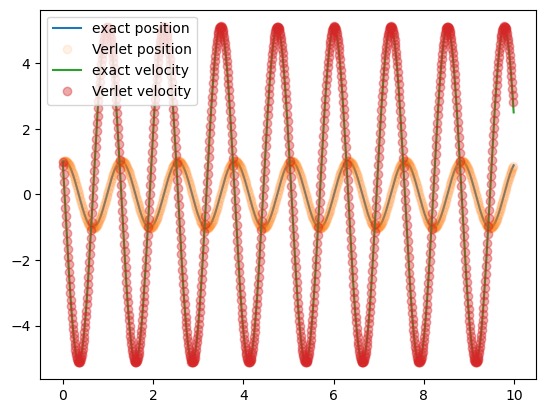

In [4]:
plt.plot(time,position(x0,v0,omega0,time),label='exact position');
plt.plot(time[0:-1],rV[0:-1],'o',label='Verlet position',alpha=0.1);
plt.plot(time,velocity(x0,v0,omega0,time),label='exact velocity')
plt.plot(time[0:-1],vV[0:-1],'o',label='Verlet velocity',alpha=0.4);
plt.legend()

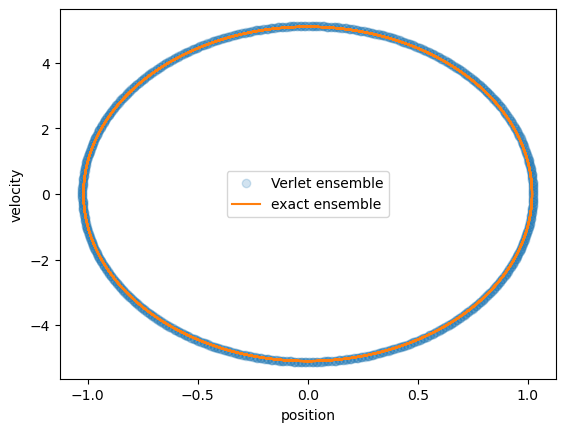

In [5]:
plt.plot(rV[0:-1],vV[0:-1],'o',label='Verlet ensemble',alpha=0.2);
plt.plot(position(x0,v0,omega0,time),velocity(x0,v0,omega0,time),label='exact ensemble');
plt.xlabel('position')
plt.ylabel('velocity')
plt.legend();